In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

In [2]:
housing = pd.read_csv('/Users/max/Computer-Intensive-Statistics-and-Applications-1MS049/Individual Project/HousingData.csv') 

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
import pandas as pd
from fancyimpute import IterativeImputer

In [ ]:
data = pd.read_csv('/Users/max/Computer-Intensive-Statistics-and-Applications-1MS049/Individual Project/HousingData.csv')
data = data.fillna(data.median())
data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,11.43,36.2


MEDV       1.000000
RM         0.695360
ZN         0.362292
B          0.333461
DIS        0.249929
CHAS       0.183844
AGE       -0.377572
RAD       -0.381626
CRIM      -0.383895
NOX       -0.427321
TAX       -0.468536
INDUS     -0.476394
PTRATIO   -0.507787
LSTAT     -0.723093
Name: MEDV, dtype: float64


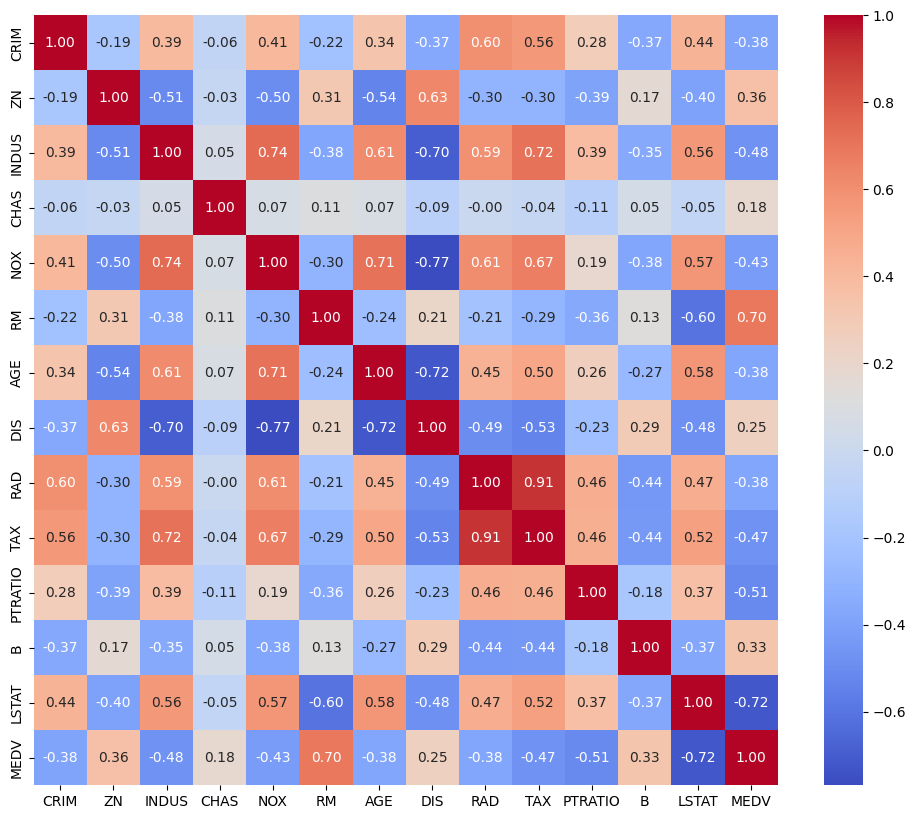

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = data.corr()  
correlation_with_medv = correlation_matrix['MEDV'].sort_values(ascending=False)  
print(correlation_with_medv)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.savefig('correlation_heatmap.pdf', format='pdf', bbox_inches='tight')
plt.show()


Spline Estimator
Linear Regression
Ridge Regression
Lasso Regression

# Nadaraya-Watson Estimator

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

Train Mean Squared Error (MSE): 22.36777859545085
Test Mean Squared Error (MSE): 24.678104277865554
Time taken: 0.8594391345977783


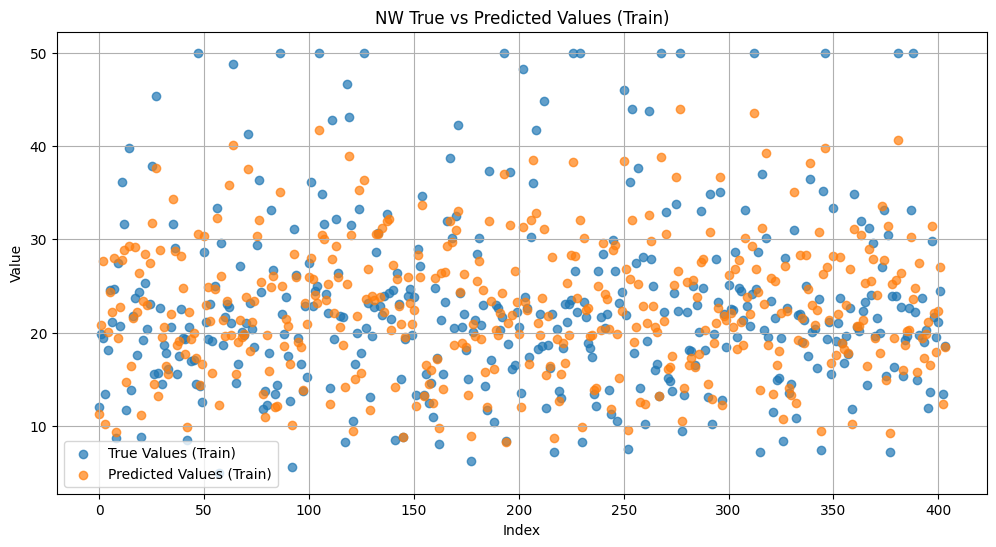

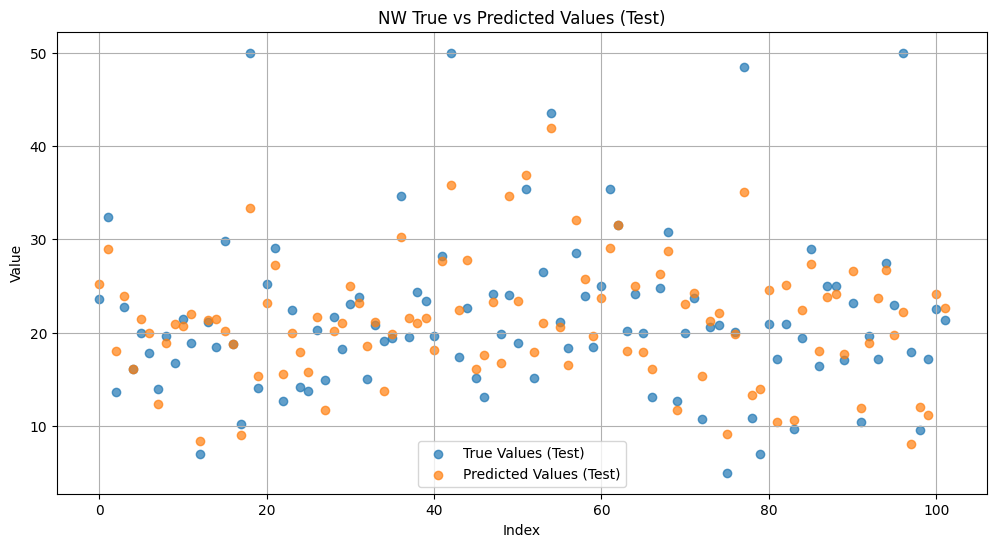

In [ ]:
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

start_time = time.time()

X_NW = data.drop(["MEDV","CHAS","RM","RAD"], axis=1).values
X_special = data[['ZN','B','INDUS','PTRATIO','LSTAT']].values
y_NW = data["MEDV"].values
X_train, X_test, y_train, y_test = train_test_split(X_special, y_NW, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def gaussian_kernel(x, x_i, bandwidth):
    return np.exp(-0.5 * np.sum(((x - x_i) / bandwidth) ** 2)) / ((2 * np.pi) ** (x.shape[0] / 2) * np.prod(bandwidth))


def nadaraya_watson(X_train, y_train, x_query, bandwidth):
    weights = np.array([gaussian_kernel(x_query, x_i, bandwidth) for x_i in X_train])
    return np.sum(weights * y_train) / np.sum(weights)


bandwidth = np.std(X_train, axis=0) * 0.5


train_predictions = [nadaraya_watson(X_train, y_train, x, bandwidth) for x in X_train]


test_predictions = [nadaraya_watson(X_train, y_train, x, bandwidth) for x in X_test]


train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print("Train Mean Squared Error (MSE):", train_mse)
print("Test Mean Squared Error (MSE):", test_mse)

end_time = time.time()
print("Time taken:", end_time - start_time)

# plt.figure(figsize=(12, 6))
# plt.scatter(range(len(y_train)), y_train, label="True Values (Train)", alpha=0.7)
# plt.scatter(range(len(train_predictions)), train_predictions, label="Predicted Values (Train)", alpha=0.7)
# plt.xlabel("Index")
# plt.ylabel("Value")
# plt.title("NW True vs Predicted Values (Train)")
# plt.legend()
# plt.grid(True)
# plt.show()

# # 可视化测试集的真实值与预测值
# plt.figure(figsize=(12, 6))
# plt.scatter(range(len(y_test)), y_test, label="True Values (Test)", alpha=0.7)
# plt.scatter(range(len(test_predictions)), test_predictions, label="Predicted Values (Test)", alpha=0.7)
# plt.xlabel("Index")
# plt.ylabel("Value")
# plt.title("NW True vs Predicted Values (Test)")
# plt.legend()
# plt.grid(True)
# plt.show()


# k-Nearest Neighbors Estimator

Train Mean Squared Error: 9.026666666666667
Train R-squared: 0.8960940141815626
Test Mean Squared Error: 17.367941176470584
Test R-squared: 0.7631658912441399
Time taken: 0.05472207069396973


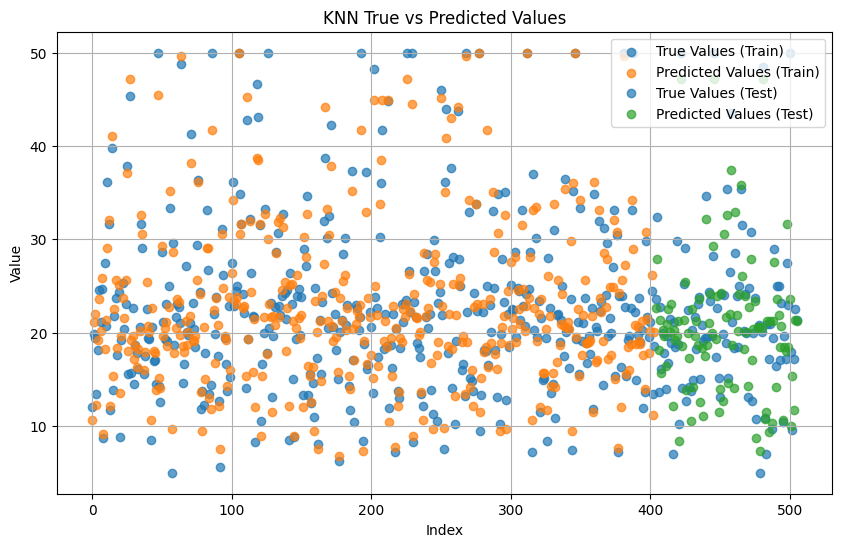

In [22]:
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
start_time = time.time()

X = data.drop("MEDV", axis=1).values
y = data["MEDV"].values
X_special = data[["RM","LSTAT","PTRATIO","INDUS","TAX"]].values
X= X_special

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


knn = KNeighborsRegressor(n_neighbors=3)  # k = 5
knn.fit(X_train, y_train)


y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)


train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Train Mean Squared Error: {train_mse}")
print(f"Test Mean Squared Error: {test_mse}")
end_time = time.time()
print("Time taken:", end_time - start_time)
# # 组合训练集和测试集的真实值及预测值
# index_train = range(len(y_train))
# index_test = range(len(y_train), len(y_train) + len(y_test))

# # 可视化
# plt.figure(figsize=(10, 6))

# # 训练集
# plt.scatter(index_train, y_train, color='tab:blue', label='True Values (Train)', alpha=0.7)
# plt.scatter(index_train, y_train_pred, color='tab:orange', label='Predicted Values (Train)', alpha=0.7)

# # 测试集
# plt.scatter(index_test, y_test, color='tab:blue', label='True Values (Test)',alpha=0.7)
# plt.scatter(index_test, y_test_pred, color='tab:green', label='Predicted Values (Test)',alpha=0.7)

# # 添加图例与标签
# plt.xlabel("Index")
# plt.ylabel("Value")
# plt.title("KNN True vs Predicted Values")
# plt.legend()
# plt.grid(True)
# plt.show()

Mean Squared Error (MSE): 27.888573315084415
Time taken: 0.08482599258422852


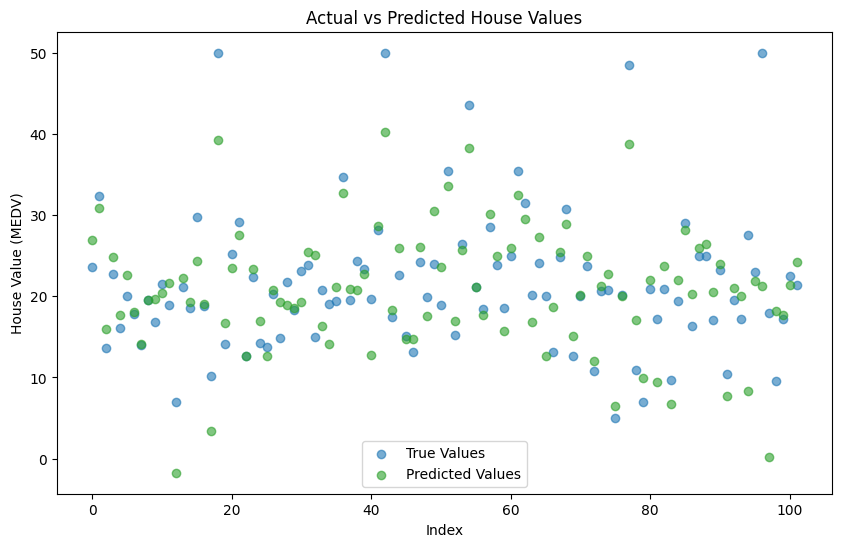

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import time
start_time = time.time()

X = data.drop("MEDV", axis=1).values
y = data["MEDV"].values
X_special = data[["RM","LSTAT","PTRATIO","INDUS","TAX"]].values
X = X_special

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


alpha = 1.0  
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train_scaled, y_train)


y_pred = ridge_model.predict(X_test_scaled)


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
end_time = time.time()
print("Time taken:", end_time - start_time)
# # Step 7: Plot scatter plot
# # Scatter plot with index on the x-axis and house value on the y-axis
# plt.figure(figsize=(10, 6))
# plt.scatter(range(len(y_test)), y_test, color='tab:blue', label='True Values', alpha=0.6)
# plt.scatter(range(len(y_pred)), y_pred, color='tab:green', label='Predicted Values', alpha=0.6)
# plt.xlabel('Index')
# plt.ylabel('House Value (MEDV)')
# plt.title('Actual vs Predicted House Values')
# plt.legend()
# plt.show()


Epoch [10/700], Train Loss: 420.0859, Test Loss: 336.6793
Epoch [20/700], Train Loss: 58.4203, Test Loss: 65.6212
Epoch [30/700], Train Loss: 42.7677, Test Loss: 34.8560
Epoch [40/700], Train Loss: 36.9000, Test Loss: 34.7561
Epoch [50/700], Train Loss: 25.3826, Test Loss: 24.0453
Epoch [60/700], Train Loss: 20.7681, Test Loss: 21.9940
Epoch [70/700], Train Loss: 19.2624, Test Loss: 19.4860
Epoch [80/700], Train Loss: 18.3835, Test Loss: 18.7293
Epoch [90/700], Train Loss: 17.6662, Test Loss: 18.2410
Epoch [100/700], Train Loss: 17.0657, Test Loss: 17.5066
Epoch [110/700], Train Loss: 16.5611, Test Loss: 17.1335
Epoch [120/700], Train Loss: 16.1261, Test Loss: 16.6922
Epoch [130/700], Train Loss: 15.7447, Test Loss: 16.3987
Epoch [140/700], Train Loss: 15.4007, Test Loss: 16.1226
Epoch [150/700], Train Loss: 15.0790, Test Loss: 15.8728
Epoch [160/700], Train Loss: 14.7779, Test Loss: 15.6844
Epoch [170/700], Train Loss: 14.5017, Test Loss: 15.5024
Epoch [180/700], Train Loss: 14.2304, 

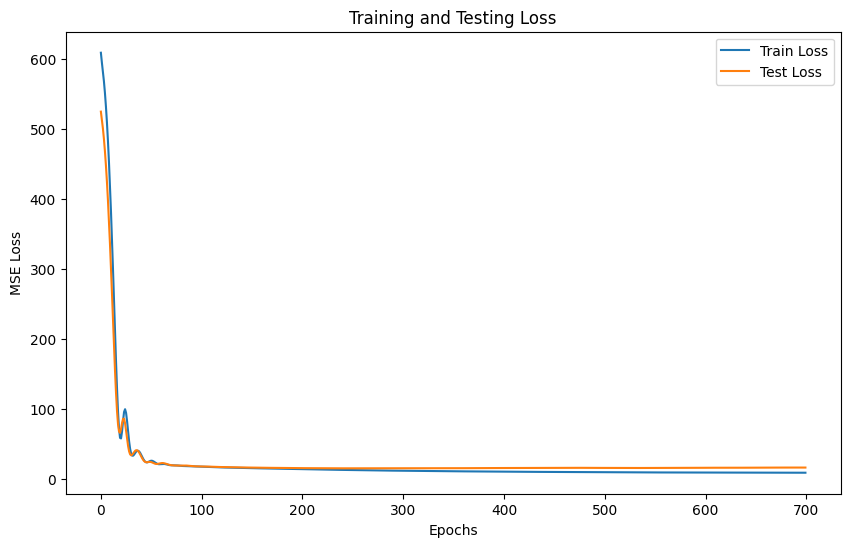

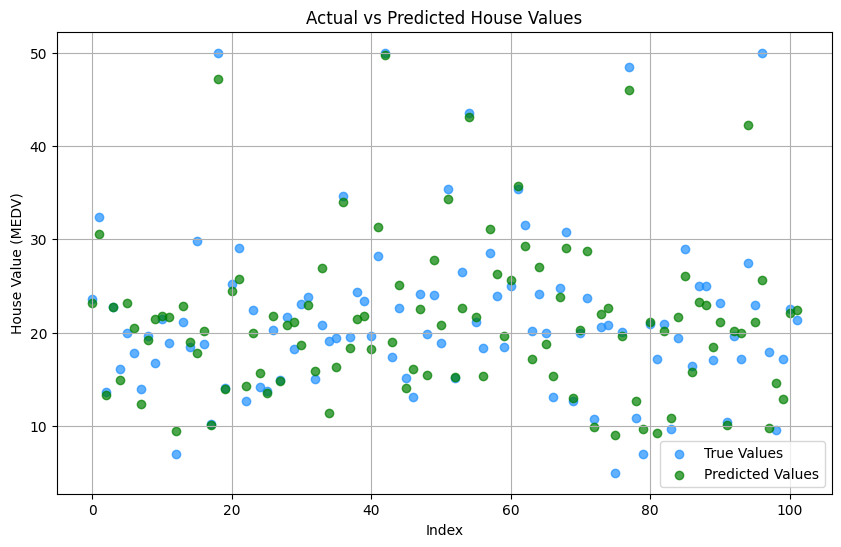

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import time
start_time = time.time()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X= data.drop("MEDV", axis=1).values
y = data["MEDV"].values
X_special = data[["RM","LSTAT","PTRATIO","INDUS","TAX"]].values
X= X_special

scaler = StandardScaler()
X = scaler.fit_transform(X)


X = torch.tensor(X, dtype=torch.float32).to(device)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1).to(device)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


class BostonHousingModel(nn.Module):
    def __init__(self):
        super(BostonHousingModel, self).__init__()
        self.fc1 = nn.Linear(X.shape[1], 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = BostonHousingModel().to(device)


criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


num_epochs = 700
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    
    model.train()
    predictions = model(X_train)
    loss = criterion(predictions, y_train)

    
    optimizer.zero_grad()  
    loss.backward()  
    optimizer.step()  

    
    train_losses.append(loss.item())
    model.eval()
    with torch.no_grad():
        test_predictions = model(X_test)
        test_loss = criterion(test_predictions, y_test).item()
        test_losses.append(test_loss)

    
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss:.4f}")


model.eval()
with torch.no_grad():
    y_pred = model(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")
end_time = time.time()
print("Time taken:", end_time - start_time)
# # 可视化结果
# # (1) 训练和测试损失曲线
# plt.figure(figsize=(10, 6))
# plt.plot(train_losses, label='Train Loss')
# plt.plot(test_losses, label='Test Loss')
# plt.xlabel('Epochs')
# plt.ylabel('MSE Loss')
# plt.legend()
# plt.title('Training and Testing Loss')
# plt.show()

# # 确保数据在 CPU 上
# y_pred = y_pred.cpu().numpy()
# y_test = y_test.cpu().numpy()

# # 绘制散点图：预测值 vs 真实值
# plt.figure(figsize=(10, 6))
# plt.scatter(range(len(y_test)), y_test, label='True Values', color='dodgerblue', alpha=0.7)
# plt.scatter(range(len(y_pred)), y_pred, label='Predicted Values', color='green', alpha=0.7)

# plt.xlabel("Index")
# plt.ylabel("House Value (MEDV)")
# plt.title("Actual vs Predicted House Values")
# plt.legend()
# plt.grid(True)
# plt.show()